# Estudos do Capítulo 5

In [15]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)]
y = (iris["target"]==2).astype(np.float64) # iris virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [21]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

non linear svm classification

In [30]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise = 0.15)

polynomial_svm = Pipeline([
    ("polynomial_features", PolynomialFeatures(10)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=1, loss="hinge"))
])

polynomial_svm.fit(X, y)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=10)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=1, loss='hinge'))])

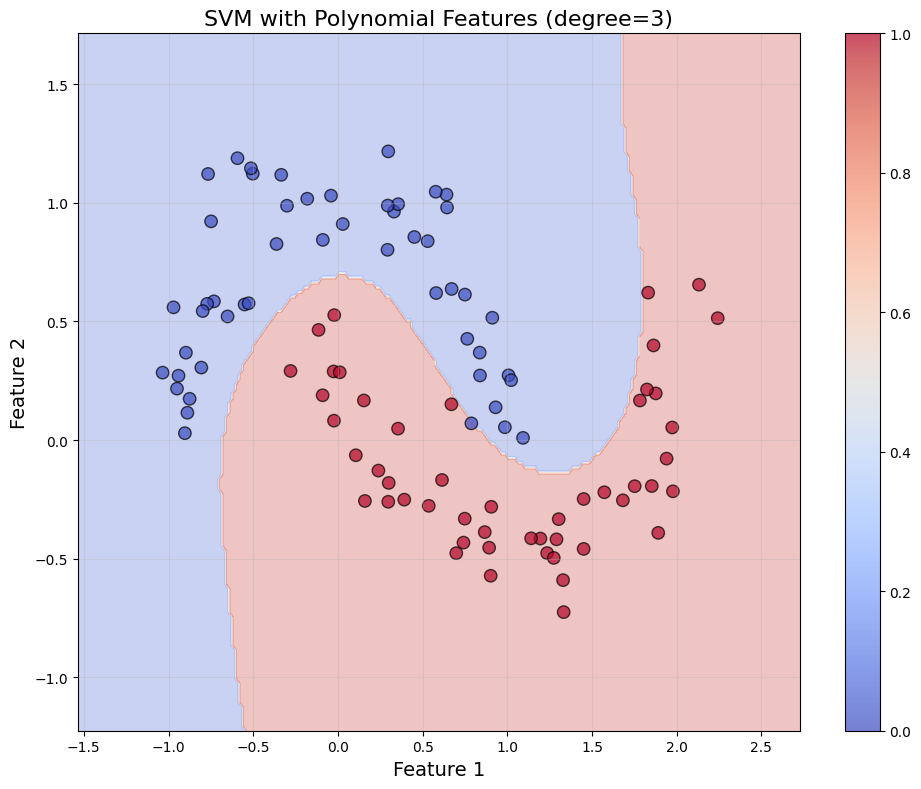

In [31]:
import matplotlib.pyplot as plt

# Function to plot the decision boundary
def plot_decision_boundary(model, X, y):
    # Set figure size
    plt.figure(figsize=(10, 8))
    
    # Determine the bounds of the plot
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create a meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Make predictions on the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    
    # Plot the data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', 
                          edgecolor='k', s=80, alpha=0.7)
    
    # Add legend and labels
    plt.colorbar(scatter)
    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.title('SVM with Polynomial Features (degree=3)', fontsize=16)
    plt.grid(True, alpha=0.3)
    
    return plt

# Visualize the decision boundary
plot = plot_decision_boundary(polynomial_svm, X, y)
plt.tight_layout()
plt.show()

In [32]:
polynomial_svm.predict([[0.10, 0.5]])

array([1])

polynomial kernel

In [35]:
from sklearn.svm import SVC  

poly_kernel_svm_clf = Pipeline([ 
    ("scaler", StandardScaler()), 
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5)) ]) 

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

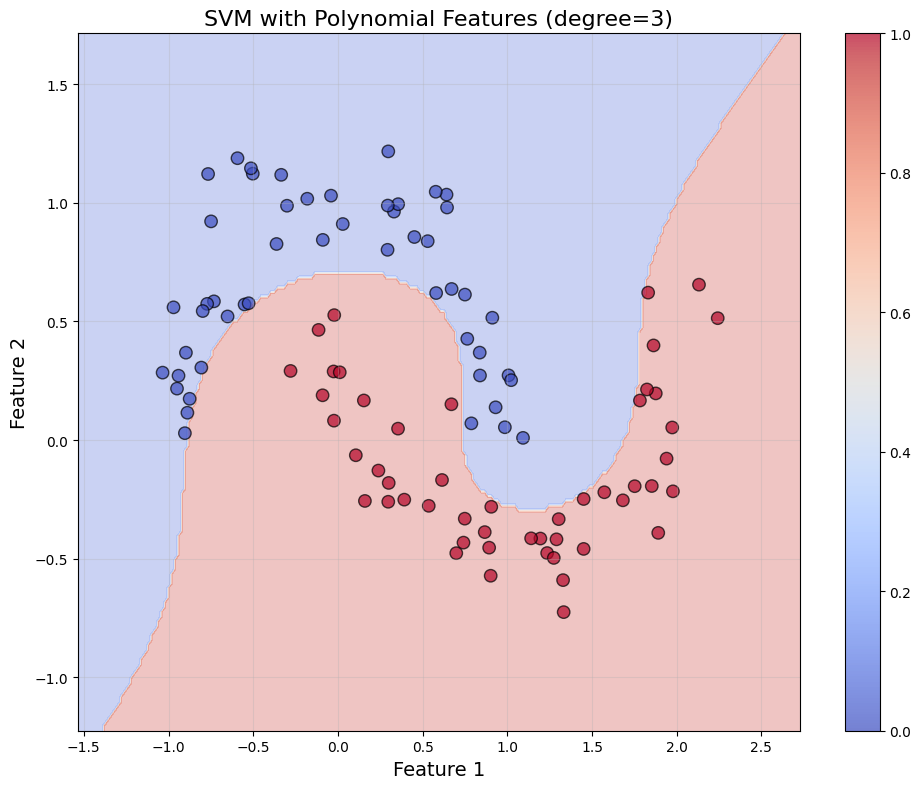

In [36]:
# Visualize the decision boundary
plot = plot_decision_boundary(poly_kernel_svm_clf, X, y)
plt.tight_layout()
plt.show()

In [43]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=1, C=1))
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=1, gamma=1))])

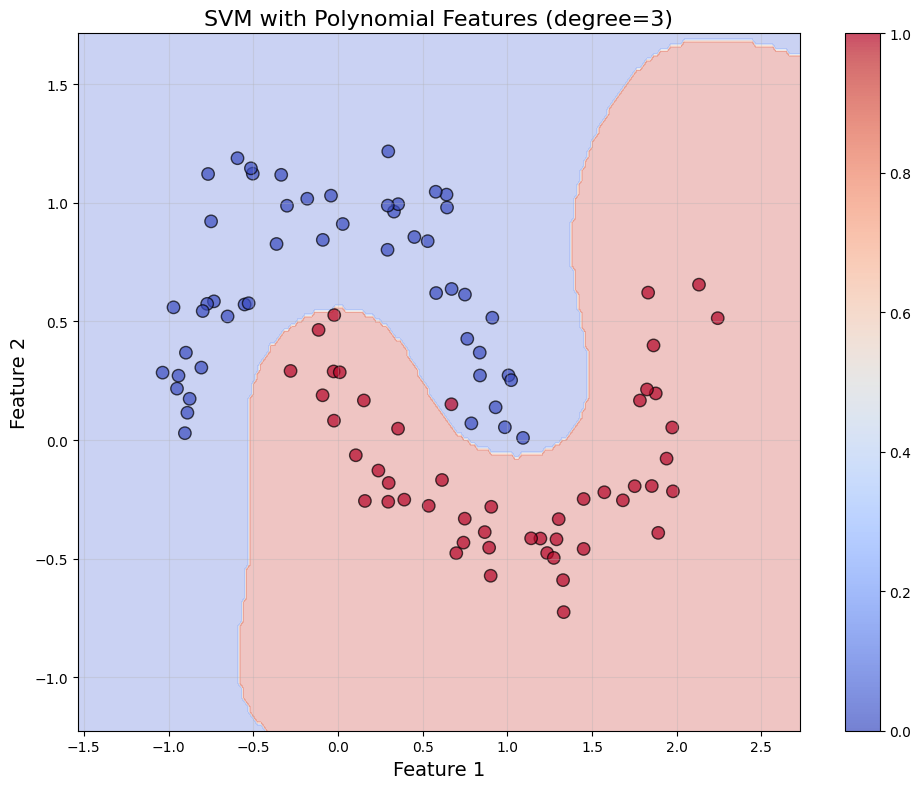

In [44]:
# Visualize the decision boundary
plot = plot_decision_boundary(rbf_kernel_svm_clf, X, y)
plt.tight_layout()
plt.show()

SVM for Regression

In [45]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

c:\Users\rlvv\My Private Documents\0. Raphael - Pessoal\specialization\study\hands_on_machine_learning\.venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


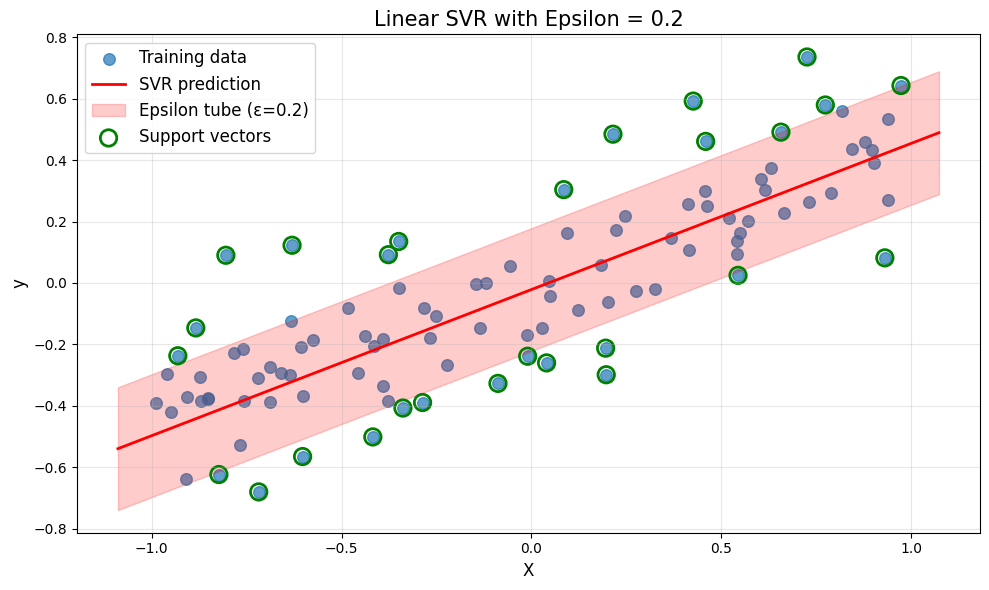

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler

# Generate sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1) - 1  # Generate X values between -1 and 1
y = 0.5 * X.reshape(-1) + 0.2 * np.random.randn(100)  # Linear relationship with some noise

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the SVR model with epsilon=1.5
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_scaled, y)

# Function to visualize SVR
def plot_svr(svm_reg, X, y, scaler, epsilon):
    plt.figure(figsize=(10, 6))
    
    # Get min and max X values for plotting the line
    x_min, x_max = X.min() - 0.1, X.max() + 0.1
    
    # Create a grid of x values to plot the function
    X_grid = np.linspace(x_min, x_max, 1000).reshape(-1, 1)
    X_grid_scaled = scaler.transform(X_grid)
    
    # Get the predictions
    y_pred = svm_reg.predict(X_grid_scaled)
    
    # Plot the data points
    plt.scatter(X, y, s=70, color='#1f77b4', alpha=0.7, label='Training data')
    
    # Plot the regression line
    plt.plot(X_grid, y_pred, color='red', linewidth=2, label='SVR prediction')
    
    # Plot the epsilon tube
    plt.fill_between(X_grid.reshape(-1), 
                     y_pred - epsilon, 
                     y_pred + epsilon, 
                     color='red', 
                     alpha=0.2,
                     label=f'Epsilon tube (ε={epsilon})')
    
    # Plot the support vectors
    y_pred_train = svm_reg.predict(X_scaled)
    outside_tube = (np.abs(y - y_pred_train) >= epsilon)
    support_vectors = X[outside_tube]
    plt.scatter(support_vectors, y[outside_tube], s=140, facecolors='none', 
                edgecolors='green', linewidth=2, label='Support vectors')
    
    # Add details to the plot
    plt.title('Linear Support Vector Regression (SVR)', fontsize=15)
    plt.xlabel('X', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    
    return plt

# Create the visualization

# Train and plot with smaller epsilon for comparison
svm_reg_small = LinearSVR(epsilon=0.2, random_state=42)
svm_reg_small.fit(X_scaled, y)
plot_svr(svm_reg_small, X, y, scaler, epsilon=0.2)
plt.title('Linear SVR with Epsilon = 0.2', fontsize=15)

plt.tight_layout()
plt.show()

In [60]:
from sklearn.svm import SVR  
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1) 
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

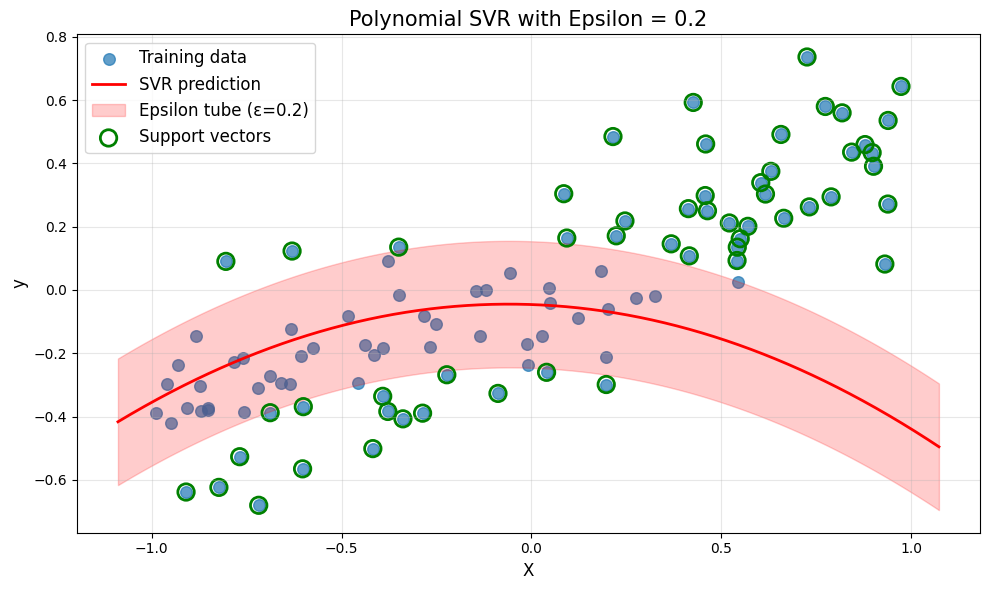

In [63]:
plot_svr(svm_poly_reg, X, y, scaler, epsilon=0.2)
plt.title('Polynomial SVR with Epsilon = 0.2', fontsize=15)

plt.tight_layout()
plt.show()